# Lecture 9: Defining Functions in Python

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review of Chart Types

Recently (in Lecture 06), we saw the Pokemon dataset. Let's use the Pokemon data to practice the various chart types we have discussed so far.

First we need to read the data.

In [2]:
pokemon = Table.read_table('pokemon.csv')
print(pokemon.labels)
pokemon = pokemon.sort('pokedex_number')
pokemon.show(3)

('abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name', 'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary')


abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100,1,0


Let's choose two variables for a reasonable line plot. Remember, in order for a line plot to make sense, we need each x value to have just one corresponding y value.

What happens if we break that rule? Well, conside a plot of y = `attack` versus x = `capture_rate`:

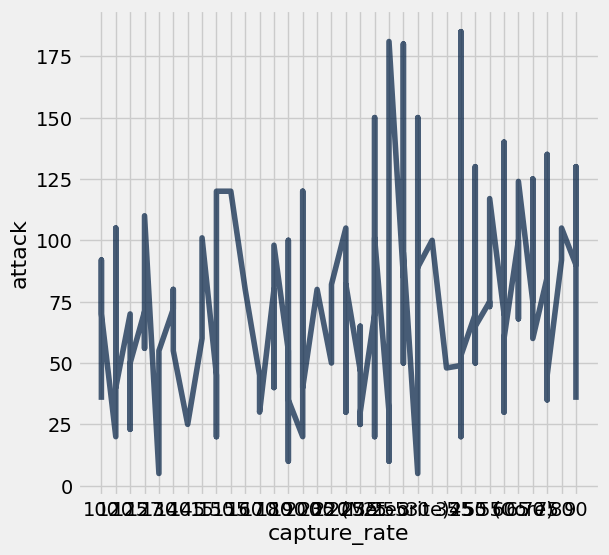

In [3]:
pokemon.plot('capture_rate', 'attack')

Not pretty.

Now consider the role of `pokedex_number` in this dataset. What are the values for this attribute?

So, each row of the table has a different value for `pokedex_number`. This assures us that for x = `pokedex_number` and y = `generation`, no x value will correspond with more than one y value. So a line plot should be sensible.

In [4]:
# First 20 rows of the table, with just three columns selected
pokemon.select('name', 'pokedex_number', 'generation').show(20)

name,pokedex_number,generation
Bulbasaur,1,1
Ivysaur,2,1
Venusaur,3,1
Charmander,4,1
Charmeleon,5,1
Charizard,6,1
Squirtle,7,1
Wartortle,8,1
Blastoise,9,1
Caterpie,10,1


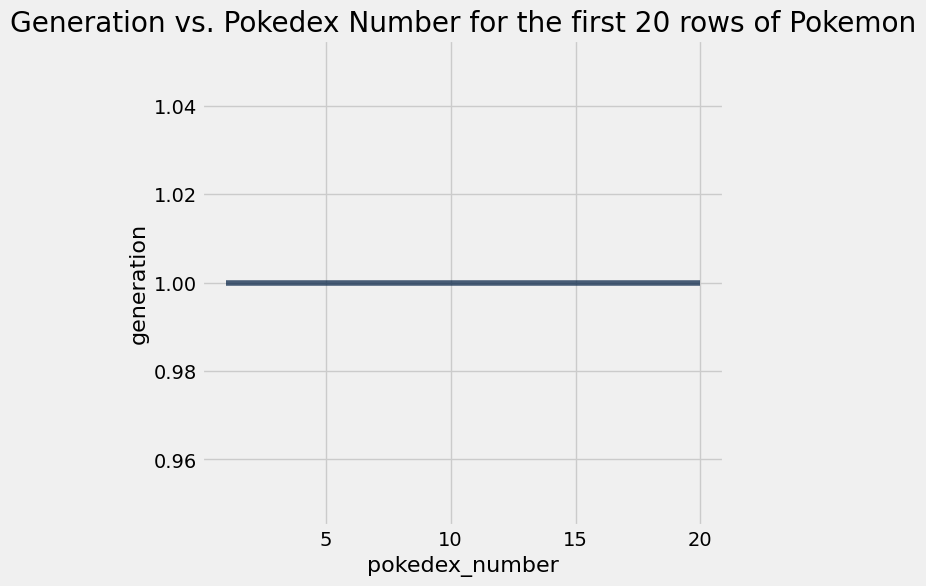

In [5]:
pokemon.take(np.arange(20)).plot('pokedex_number', 'generation')
plots.title('Generation vs. Pokedex Number for the first 20 rows of Pokemon');

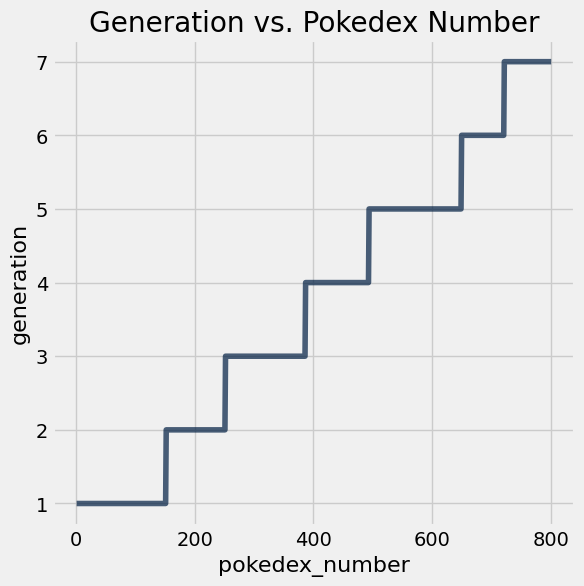

In [6]:
# Let's look at all the rows in a line plot

pokemon.plot('pokedex_number', 'generation')
plots.title('Generation vs. Pokedex Number');

What do we learn from the line plot we just drew?

Now suppose we want to visualize the distribution of the `generation` attribute (that is, how many Pokemon are in each generation?). That calls for a bar chart (`barh` method). We need to mention `generation` as the first argument, and we need a "count" variable that can provide values for the second argument. We use the `group` method to gather the counts, and then we are all set to draw the bar chart.

In [7]:
generations = pokemon.group('generation')
generations

generation,count
1,151
2,100
3,135
4,107
5,156
6,72
7,80


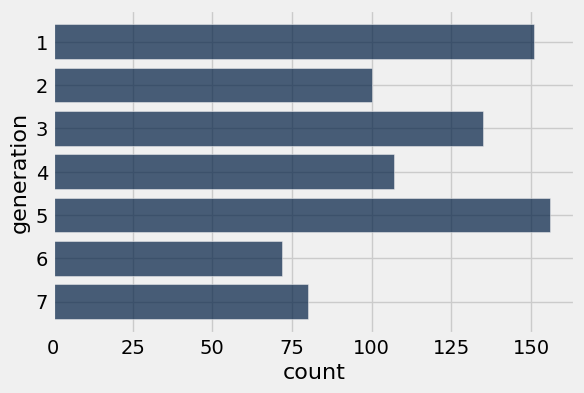

In [8]:
generations.barh('generation', 'count')

What do we learn from this barchart?

For the pokemon in this table, is there an association between `against_ice` and `against_fire`? If an individual is high on one of these attributes, will they tend to be high on the other? A scatterplot is the visualization we need for this question. 

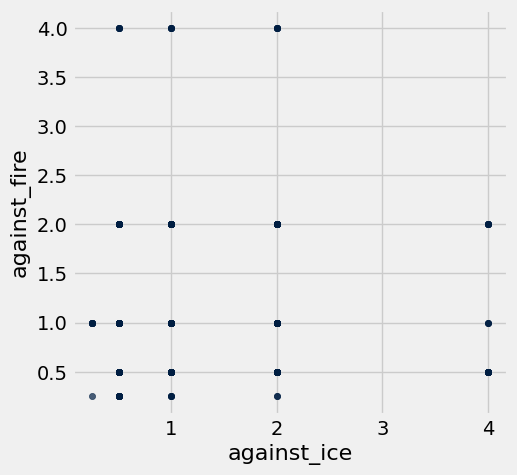

In [9]:
pokemon.scatter('against_ice', 'against_fire')

These attributes have discrete values with MANY repeated values, so the scatterplot doesn't actually work very well in this situation. We will learn about **pivot tables** later this week; a pivot table would probably be helpful in this situation.

If we have numerical variables with only a few repeated values, the scatterplot works well. Let's try plotting `height_m` versus `weight_kg`. But first, we need to remove the rows where no height or no weight value was given in the original table (I filled those spots in the CSV file with the value `9999` as a code for "missing").

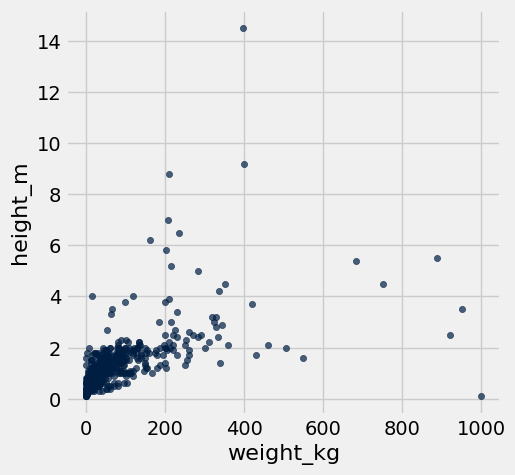

In [10]:
pokemon2 = pokemon.where('weight_kg',are.below(9999)).where('height_m',are.below(9999))
pokemon2.scatter('weight_kg', 'height_m')

That's a more reasonble scatterplot.

Most of the individuals seem to weigh 300 kg or less and be no more than 3 meters tall. If we focus our plot on that part of the data, we can get a better sense for what's going on in the lower-left corner of the previous plot.

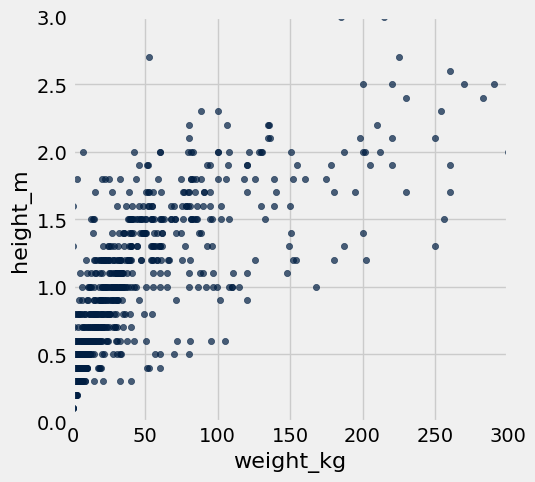

In [11]:
pokemon2.scatter('weight_kg', 'height_m')
plots.xlim(0,300);
plots.ylim(0,3);

As we might have expected, there is a positive association between height and weight for these Pokemon.

**Question**: To visualize the distribution of Pokemon heights, which chart type should we use?

  - bar chart
  - line graph
  - scatter plot
  - histogram

If you said "histogram", you are right! `height_m` is a numerical variable, so we use a *histogram* to visualize its distribution. 

Start by examining the "default" Height histogram.

Text(0.5, 1.0, 'Distribution of Pokemon Heights')

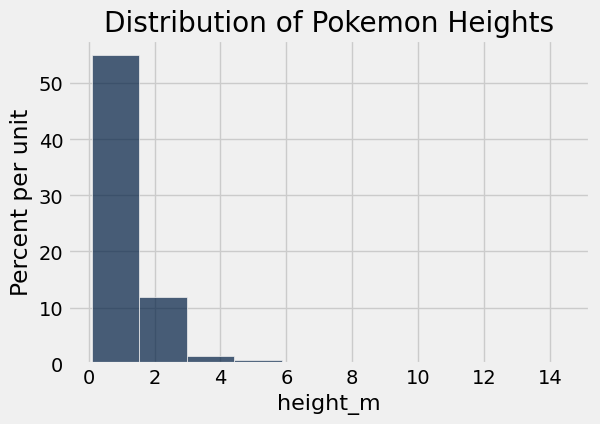

In [12]:
pokemon2.hist('height_m')
plots.title('Distribution of Pokemon Heights')

What is the largest actual height in the data?

In [13]:
np.max(pokemon2.column('height_m'))

14.5

In [14]:
# Which Pokemon is so huge?
tallest = pokemon2.where('height_m', are.above(13)).column('name')
tallest

array(['Wailord'],
      dtype='<U12')

In [15]:
# That's an extreme outlier. To get a better view of the main distribution,
# limit the data to heights that are less than 3 m.
heights_below_3 = pokemon2.where('height_m', are.below(3))
heights_below_3.column('height_m')

array([ 0.7,  1. ,  2. ,  0.6,  1.1,  1.7,  0.5,  1. ,  1.6,  0.3,  0.7,
        1.1,  0.3,  0.6,  1. ,  0.3,  1.1,  1.5,  0.3,  1.2,  2. ,  0.4,
        0.4,  0.8,  1.3,  0.5,  0.9,  1.4,  0.6,  1.3,  0.5,  1. ,  0.8,
        1.6,  0.5,  0.8,  1.2,  0.3,  1. ,  1. ,  1.5,  0.8,  1.7,  0.5,
        1. ,  0.7,  1.9,  0.6,  1. ,  1.3,  0.9,  1.3,  1.5,  0.8,  1.5,
        1.6,  0.7,  1. ,  1.7,  0.9,  1.6,  1. ,  1.7,  1.2,  1.6,  0.3,
        1. ,  0.8,  1.4,  1.8,  1.1,  1.7,  0.3,  1.5,  1.3,  1.6,  1.5,
        1. ,  1.6,  0.4,  1.3,  0.5,  1.2,  0.4,  0.4,  1.5,  1.4,  1.2,
        0.6,  1.2,  1. ,  1.9,  1.1,  1. ,  2.2,  0.4,  1.2,  0.6,  1.3,
        0.8,  1.1,  1.3,  1.5,  1.4,  1.1,  1.3,  1.5,  1.4,  0.9,  2.5,
        0.3,  0.3,  1. ,  0.8,  0.9,  0.8,  0.4,  1. ,  0.5,  1.3,  1.8,
        2.1,  1.7,  1.6,  2. ,  1.8,  2.2,  2. ,  0.4,  0.9,  1.2,  1.8,
        0.5,  0.9,  1.7,  0.6,  1.1,  2.3,  0.8,  1.8,  0.7,  1.6,  1. ,
        1.4,  0.5,  1.1,  1.8,  0.5,  1.2,  0.3,  0

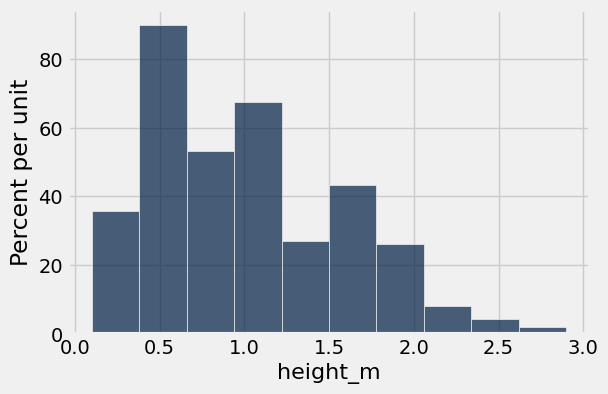

In [16]:
# with default bins
heights_below_3.hist('height_m')

In [17]:
# with custom bins of width 0.2
my_bins = np.arange(0, 3, 0.2)
binned_heights = heights_below_3.bin('height_m', bins=my_bins)
binned_heights.show(3)

bin,height_m count
0,5
0.2,70
0.4,189


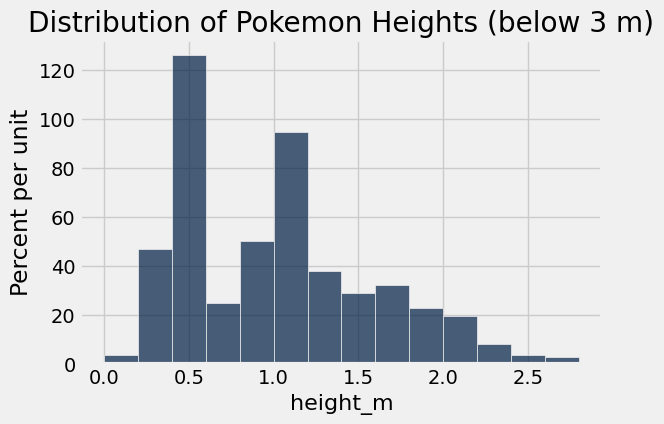

In [18]:
heights_below_3.hist('height_m', bins=my_bins)
plots.title('Distribution of Pokemon Heights (below 3 m)');

We see that Pokemon heights around 0.5 m and around 1.0 m are quite common.

**Back to slides...**

## Functions

In [19]:
# define a new function named 'triple'; it takes one parameter
# Notice the colon
def triple(x):
    return 3 * x

To **call** a function, we type the name of the function followed by 0 or more argument expressions in parentheses.

In [20]:
triple(3)  # Call triple, using 3 as the value for x

9

In [21]:
triple(1.1)  # Call triple, using 1.1 as the value for x

3.3000000000000003

In [22]:
num = 4 + 1
triple(num)

15

In [23]:
triple('ha')

'hahaha'

In [24]:
# We can pass in an array
nums = make_array(1, 2, 3)
triple(nums)

array([3, 6, 9])

### Functions can take multiple arguments

In [25]:
# Define the 'hypotenuse' function which takes values a and b
# It returns the length of the hypotenuse for a right triangle with legs of length a & b
def hypotenuse(a, b):
    sum_squares = a**2 + b**2
    result = np.sqrt(sum_squares)
    return result

In [26]:
hypotenuse(3, 4)  # When leg lengths are 3 and 4...

5.0

In [27]:
hypotenuse(12.5, 15.09)  

19.594848812889577

## Don't Reinvent the Wheel

If the desired functionality already exists in a module that you're familiar with, just import the function from that module! 

And if the function *seems* like it ought to be pretty standard, but you're not sure which module defines that function, do some research to see if you can locate it. In fact, most of the functions we will use are in base Python (they're "built in") or are defined in `numpy` or `datascience`.

But sometimes we need a **special-built** function and it can be easier to write the function ourselves rather than scouring the web for information about a relevant module.

Functions are also extemely helpful in avoiding *code duplication*. When we find ourselves using the same few lines of code repeatedly, we can encapsulate those lines of code in a named function. This can improve the readability of our code and make it easier to modify.

**Back to slides...**

## Apply

Make a 2-column table of leg lengths for some right triangles, then use `apply` with our `hypotenuse` function to find the hypotenuse length for each triangle and add that information to the table.

In [28]:
triangles = Table().with_columns(
    'a', make_array(2, 2, 3, 3, 4, 4),
    'b', make_array(1, 2, 3, 4, 5, 6)
)
triangles

a,b
2,1
2,2
3,3
3,4
4,5
4,6


In [29]:
triangles.apply(hypotenuse, 'a', 'b')

array([ 2.23606798,  2.82842712,  4.24264069,  5.        ,  6.40312424,
        7.21110255])

In [30]:
triangles = triangles.with_column('hyp', triangles.apply(hypotenuse, 'a', 'b'))
triangles

a,b,hyp
2,1,2.23607
2,2,2.82843
3,3,4.24264
3,4,5
4,5,6.40312
4,6,7.2111
